# Introduction to DataFrames
**[Bogumił Kamiński](http://bogumilkaminski.pl/about/), February 8, 2019**

In [1]:
using DataFrames

## Дополнительно - функции из сторонних пакетов

In [2]:
using FreqTables
df = DataFrame(a=rand('a':'d', 1000), b=rand(["x", "y", "z"], 1000))
ft = freqtable(df, :a, :b) # обратите внимание, что размеры сортируются, если это возможно

4×3 Named Array{Int64,2}
a ╲ b │  x   y   z
──────┼───────────
'a'   │ 77  75  82
'b'   │ 84  80  92
'c'   │ 80  86  90
'd'   │ 79  91  84

In [3]:
ft[1,1], ft['b', "z"] # Вы можете индексировать результат, используя цифры или имена

(77, 92)

In [4]:
prop(ft, 1) # получение пропорций - 1 означает, что мы хотим вычислить их в строках (первое измерение)

4×3 Named Array{Float64,2}
a ╲ b │        x         y         z
──────┼─────────────────────────────
'a'   │  0.32906  0.320513  0.350427
'b'   │ 0.328125    0.3125  0.359375
'c'   │   0.3125  0.335938  0.351563
'd'   │ 0.311024  0.358268  0.330709

In [5]:
prop(ft, 2) # а теперь столбцы нормализованы до 1,0 

4×3 Named Array{Float64,2}
a ╲ b │        x         y         z
──────┼─────────────────────────────
'a'   │ 0.240625  0.225904  0.235632
'b'   │   0.2625  0.240964  0.264368
'c'   │     0.25  0.259036  0.258621
'd'   │ 0.246875  0.274096  0.241379

In [6]:
x = categorical(rand(1:3, 10))
levels!(x, [3, 1, 2, 4]) # изменение порядка уровней и добавление дополнительного уровня
freqtable(x) # порядок сохраняется и отображается неиспользуемый уровень

4-element Named Array{Int64,1}
Dim1  │ 
──────┼──
3     │ 3
1     │ 3
2     │ 4
4     │ 0

In [7]:
freqtable([1,1,2,3,missing]) # по умолчанию перечислены пропуски

4-element Named Array{Int64,1}
Dim1    │ 
────────┼──
1       │ 2
2       │ 1
3       │ 1
missing │ 1

In [8]:
freqtable([1,1,2,3,missing], skipmissing=true) # но мы можем пропустить их

3-element Named Array{Int64,1}
Dim1  │ 
──────┼──
1     │ 2
2     │ 1
3     │ 1

In [9]:
df = DataFrame(a=rand(3:4, 1000), b=rand(5:6, 1000))
ft = freqtable(df, :a, :b) # теперь в шапке числа

2×2 Named Array{Int64,2}
a ╲ b │   5    6
──────┼─────────
3     │ 240  260
4     │ 270  230

In [10]:
ft[3,5] # это ошибка - стандартное индексирование массива имеет приоритет

BoundsError: BoundsError: attempt to access 2×2 Array{Int64,2} at index [3, 5]

In [11]:
using NamedArrays
ft[Name(3), Name(5)] # Вы должны использовать Name () из NamedArrays

ArgumentError: ArgumentError: Package NamedArrays not found in current path:
- Run `import Pkg; Pkg.add("NamedArrays")` to install the NamedArrays package.


### DataFramesMeta - работает с `DataFrame`

In [12]:
using DataFramesMeta
df = DataFrame(x=1:8, y='a':'h', z=repeat([true,false], outer=4))

8×3 DataFrame
│ Row │ x     │ y    │ z     │
│     │ Int64 │ Char │ Bool  │
├─────┼───────┼──────┼───────┤
│ 1   │ 1     │ 'a'  │ true  │
│ 2   │ 2     │ 'b'  │ false │
│ 3   │ 3     │ 'c'  │ true  │
│ 4   │ 4     │ 'd'  │ false │
│ 5   │ 5     │ 'e'  │ true  │
│ 6   │ 6     │ 'f'  │ false │
│ 7   │ 7     │ 'g'  │ true  │
│ 8   │ 8     │ 'h'  │ false │

In [13]:
@with(df, :x+:z) # выражения со столбцами DataFrame

8-element Array{Int64,1}:
 2
 2
 4
 4
 6
 6
 8
 8

In [14]:
@with df begin # Вы можете определить блоки кода
    a = :x[:z]
    b = :x[.!:z]
    :y + [a; b]
end

8-element Array{Char,1}:
 'b'
 'e'
 'h'
 'k'
 'g'
 'j'
 'm'
 'p'

In [15]:
a # @with создает жесткую область видимости, чтобы переменные не утекли

UndefVarError: UndefVarError: a not defined

In [16]:
df2 = DataFrame(a = [:a, :b, :c])
@with(df2, :a .== ^(:a)) # иногда хочется работать с сырыми символами, ^() избегает это

3-element BitArray{1}:
  true
 false
 false

In [17]:
df2 = DataFrame(x=1:3, y=4:6, z=7:9)
@with(df2, cols(2:3)) # cols (выражение) переводится в df2 [выражение]

3×2 DataFrame
│ Row │ y     │ z     │
│     │ Int64 │ Int64 │
├─────┼───────┼───────┤
│ 1   │ 4     │ 7     │
│ 2   │ 5     │ 8     │
│ 3   │ 6     │ 9     │

In [18]:
@where(df, :x .< 4, :z .== true) # очень полезный макрос для фильтрации

2×3 DataFrame
│ Row │ x     │ y    │ z    │
│     │ Int64 │ Char │ Bool │
├─────┼───────┼──────┼──────┤
│ 1   │ 1     │ 'a'  │ true │
│ 2   │ 3     │ 'c'  │ true │

In [19]:
@select(df, :x, y = 2*:x, z=:y) # создать новый DataFrame на основе старого

8×3 DataFrame
│ Row │ x     │ y     │ z    │
│     │ Int64 │ Int64 │ Char │
├─────┼───────┼───────┼──────┤
│ 1   │ 1     │ 2     │ 'a'  │
│ 2   │ 2     │ 4     │ 'b'  │
│ 3   │ 3     │ 6     │ 'c'  │
│ 4   │ 4     │ 8     │ 'd'  │
│ 5   │ 5     │ 10    │ 'e'  │
│ 6   │ 6     │ 12    │ 'f'  │
│ 7   │ 7     │ 14    │ 'g'  │
│ 8   │ 8     │ 16    │ 'h'  │

In [20]:
@transform(df, a=1, x = 2*:x, y=:x) # создать новый DataFrame, добавив столбцы на основе старого

8×4 DataFrame
│ Row │ x     │ y     │ z     │ a     │
│     │ Int64 │ Int64 │ Bool  │ Int64 │
├─────┼───────┼───────┼───────┼───────┤
│ 1   │ 2     │ 1     │ true  │ 1     │
│ 2   │ 4     │ 2     │ false │ 1     │
│ 3   │ 6     │ 3     │ true  │ 1     │
│ 4   │ 8     │ 4     │ false │ 1     │
│ 5   │ 10    │ 5     │ true  │ 1     │
│ 6   │ 12    │ 6     │ false │ 1     │
│ 7   │ 14    │ 7     │ true  │ 1     │
│ 8   │ 16    │ 8     │ false │ 1     │

In [21]:
@transform(df, a=1, b=:a) # используется старый DataFrame и :a там нет

ArgumentError: ArgumentError: column name :a not found in the data frame; existing most similar names are: :x, :y and :z

In [22]:
@orderby(df, :z, -:x) # сортировка в новый фрейм данных, менее мощный, чем sort, но легкий

8×3 DataFrame
│ Row │ x     │ y    │ z     │
│     │ Int64 │ Char │ Bool  │
├─────┼───────┼──────┼───────┤
│ 1   │ 8     │ 'h'  │ false │
│ 2   │ 6     │ 'f'  │ false │
│ 3   │ 4     │ 'd'  │ false │
│ 4   │ 2     │ 'b'  │ false │
│ 5   │ 7     │ 'g'  │ true  │
│ 6   │ 5     │ 'e'  │ true  │
│ 7   │ 3     │ 'c'  │ true  │
│ 8   │ 1     │ 'a'  │ true  │

In [23]:
@linq df |> # цепочка операций в DataFrame
    where(:x .< 5) |>
    orderby(:z) |>
    transform(x²=:x.^2) |>
    select(:z, :x, :x²)

4×3 DataFrame
│ Row │ z     │ x     │ x²    │
│     │ Bool  │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ false │ 2     │ 4     │
│ 2   │ false │ 4     │ 16    │
│ 3   │ true  │ 1     │ 1     │
│ 4   │ true  │ 3     │ 9     │

In [24]:
f(df, col) = df[col] # Вы можете определить свои собственные функции и поместить их в цепочку
@linq df |> where(:x .<= 4) |> f(:x)

4-element Array{Int64,1}:
 1
 2
 3
 4

### DataFramesMeta - работает на сгруппированных `DataFrame`

In [25]:
df = DataFrame(a = 1:12, b = repeat('a':'d', outer=3))
g = groupby(df, :b)

GroupedDataFrame with 4 groups based on key: b
First Group (3 rows): b = 'a'
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 1     │ 'a'  │
│ 2   │ 5     │ 'a'  │
│ 3   │ 9     │ 'a'  │
⋮
Last Group (3 rows): b = 'd'
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 4     │ 'd'  │
│ 2   │ 8     │ 'd'  │
│ 3   │ 12    │ 'd'  │

In [26]:
using Statistics
@by(df, :b, first=first(:a), last=last(:a), mean=mean(:a)) # похож на DataFrames

4×4 DataFrame
│ Row │ b    │ first │ last  │ mean    │
│     │ Char │ Int64 │ Int64 │ Float64 │
├─────┼──────┼───────┼───────┼─────────┤
│ 1   │ 'a'  │ 1     │ 9     │ 5.0     │
│ 2   │ 'b'  │ 2     │ 10    │ 6.0     │
│ 3   │ 'c'  │ 3     │ 11    │ 7.0     │
│ 4   │ 'd'  │ 4     │ 12    │ 8.0     │

In [27]:
@based_on(g, first=first(:a), last=last(:a), mean=mean(:a)) # также но на сгруппированных DataFrame

4×4 DataFrame
│ Row │ b    │ first │ last  │ mean    │
│     │ Char │ Int64 │ Int64 │ Float64 │
├─────┼──────┼───────┼───────┼─────────┤
│ 1   │ 'a'  │ 1     │ 9     │ 5.0     │
│ 2   │ 'b'  │ 2     │ 10    │ 6.0     │
│ 3   │ 'c'  │ 3     │ 11    │ 7.0     │
│ 4   │ 'd'  │ 4     │ 12    │ 8.0     │

In [28]:
@where(g, mean(:a) > 6.5) # Фильтр групп на агрегатных условиях

GroupedDataFrame with 2 groups based on key: b
First Group (3 rows): b = 'c'
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 3     │ 'c'  │
│ 2   │ 7     │ 'c'  │
│ 3   │ 11    │ 'c'  │
⋮
Last Group (3 rows): b = 'd'
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 4     │ 'd'  │
│ 2   │ 8     │ 'd'  │
│ 3   │ 12    │ 'd'  │

In [29]:
@orderby(g, -sum(:a)) 
# порядок групп на совокупных условиях крашится, но должно быть исправлено в будущем

GroupedDataFrame with 4 groups based on key: b
First Group (3 rows): b = 'd'
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 4     │ 'd'  │
│ 2   │ 8     │ 'd'  │
│ 3   │ 12    │ 'd'  │
⋮
Last Group (3 rows): b = 'a'
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 1     │ 'a'  │
│ 2   │ 5     │ 'a'  │
│ 3   │ 9     │ 'a'  │

In [30]:
@transform(g, center = mean(:a), centered = :a .- mean(:a)) 
# выполнять операции внутри группы и возвращать неопрятный DataFrame

12×4 DataFrame
│ Row │ a     │ b    │ center  │ centered │
│     │ Int64 │ Char │ Float64 │ Float64  │
├─────┼───────┼──────┼─────────┼──────────┤
│ 1   │ 1     │ 'a'  │ 5.0     │ -4.0     │
│ 2   │ 5     │ 'a'  │ 5.0     │ 0.0      │
│ 3   │ 9     │ 'a'  │ 5.0     │ 4.0      │
│ 4   │ 2     │ 'b'  │ 6.0     │ -4.0     │
│ 5   │ 6     │ 'b'  │ 6.0     │ 0.0      │
│ 6   │ 10    │ 'b'  │ 6.0     │ 4.0      │
│ 7   │ 3     │ 'c'  │ 7.0     │ -4.0     │
│ 8   │ 7     │ 'c'  │ 7.0     │ 0.0      │
│ 9   │ 11    │ 'c'  │ 7.0     │ 4.0      │
│ 10  │ 4     │ 'd'  │ 8.0     │ -4.0     │
│ 11  │ 8     │ 'd'  │ 8.0     │ 0.0      │
│ 12  │ 12    │ 'd'  │ 8.0     │ 4.0      │

In [31]:
DataFrame(g) # эквивалентно collect(g)

12×2 DataFrame
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 1     │ 'a'  │
│ 2   │ 5     │ 'a'  │
│ 3   │ 9     │ 'a'  │
│ 4   │ 2     │ 'b'  │
│ 5   │ 6     │ 'b'  │
│ 6   │ 10    │ 'b'  │
│ 7   │ 3     │ 'c'  │
│ 8   │ 7     │ 'c'  │
│ 9   │ 11    │ 'c'  │
│ 10  │ 4     │ 'd'  │
│ 11  │ 8     │ 'd'  │
│ 12  │ 12    │ 'd'  │

In [32]:
@transform(g) # на самом деле это то же самое, что DataFrame ()

12×2 DataFrame
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 1     │ 'a'  │
│ 2   │ 5     │ 'a'  │
│ 3   │ 9     │ 'a'  │
│ 4   │ 2     │ 'b'  │
│ 5   │ 6     │ 'b'  │
│ 6   │ 10    │ 'b'  │
│ 7   │ 3     │ 'c'  │
│ 8   │ 7     │ 'c'  │
│ 9   │ 11    │ 'c'  │
│ 10  │ 4     │ 'd'  │
│ 11  │ 8     │ 'd'  │
│ 12  │ 12    │ 'd'  │

In [33]:
@linq df |> groupby(:b) |> where(mean(:a) > 6.5) |> DataFrame 
# Вы также можете создавать цепочки на сгруппированных фреймах данных

6×2 DataFrame
│ Row │ a     │ b    │
│     │ Int64 │ Char │
├─────┼───────┼──────┤
│ 1   │ 3     │ 'c'  │
│ 2   │ 7     │ 'c'  │
│ 3   │ 11    │ 'c'  │
│ 4   │ 4     │ 'd'  │
│ 5   │ 8     │ 'd'  │
│ 6   │ 12    │ 'd'  │

### DataFramesMeta - операции по строкам в `DataFrame`

In [34]:
df = DataFrame(a = 1:12, b = repeat(1:4, outer=3))

12×2 DataFrame
│ Row │ a     │ b     │
│     │ Int64 │ Int64 │
├─────┼───────┼───────┤
│ 1   │ 1     │ 1     │
│ 2   │ 2     │ 2     │
│ 3   │ 3     │ 3     │
│ 4   │ 4     │ 4     │
│ 5   │ 5     │ 1     │
│ 6   │ 6     │ 2     │
│ 7   │ 7     │ 3     │
│ 8   │ 8     │ 4     │
│ 9   │ 9     │ 1     │
│ 10  │ 10    │ 2     │
│ 11  │ 11    │ 3     │
│ 12  │ 12    │ 4     │

In [35]:
# такие условия часто необходимы, но их сложно написать
@transform(df, x = ifelse.((:a .> 6) .& (:b .== 4), "yes", "no"))

12×3 DataFrame
│ Row │ a     │ b     │ x      │
│     │ Int64 │ Int64 │ String │
├─────┼───────┼───────┼────────┤
│ 1   │ 1     │ 1     │ no     │
│ 2   │ 2     │ 2     │ no     │
│ 3   │ 3     │ 3     │ no     │
│ 4   │ 4     │ 4     │ no     │
│ 5   │ 5     │ 1     │ no     │
│ 6   │ 6     │ 2     │ no     │
│ 7   │ 7     │ 3     │ no     │
│ 8   │ 8     │ 4     │ yes    │
│ 9   │ 9     │ 1     │ no     │
│ 10  │ 10    │ 2     │ no     │
│ 11  │ 11    │ 3     │ no     │
│ 12  │ 12    │ 4     │ yes    │

In [36]:
# Одним из вариантов является использование функции, которая работает на одном view и транслирует его
myfun(a, b) = a > 6 && b == 4 ? "yes" : "no"
@transform(df, x = myfun.(:a, :b))

12×3 DataFrame
│ Row │ a     │ b     │ x      │
│     │ Int64 │ Int64 │ String │
├─────┼───────┼───────┼────────┤
│ 1   │ 1     │ 1     │ no     │
│ 2   │ 2     │ 2     │ no     │
│ 3   │ 3     │ 3     │ no     │
│ 4   │ 4     │ 4     │ no     │
│ 5   │ 5     │ 1     │ no     │
│ 6   │ 6     │ 2     │ no     │
│ 7   │ 7     │ 3     │ no     │
│ 8   │ 8     │ 4     │ yes    │
│ 9   │ 9     │ 1     │ no     │
│ 10  │ 10    │ 2     │ no     │
│ 11  │ 11    │ 3     │ no     │
│ 12  │ 12    │ 4     │ yes    │

In [37]:
# или вы можете использовать @byrow! макрос, который позволяет обрабатывать DataFrame по очереди
@byrow! df begin
    @newcol x::Vector{String}
    :x = :a > 6 && :b == 4 ? "yes" : "no"
end

12×3 DataFrame
│ Row │ a     │ b     │ x      │
│     │ Int64 │ Int64 │ String │
├─────┼───────┼───────┼────────┤
│ 1   │ 1     │ 1     │ no     │
│ 2   │ 2     │ 2     │ no     │
│ 3   │ 3     │ 3     │ no     │
│ 4   │ 4     │ 4     │ no     │
│ 5   │ 5     │ 1     │ no     │
│ 6   │ 6     │ 2     │ no     │
│ 7   │ 7     │ 3     │ no     │
│ 8   │ 8     │ 4     │ yes    │
│ 9   │ 9     │ 1     │ no     │
│ 10  │ 10    │ 2     │ no     │
│ 11  │ 11    │ 3     │ no     │
│ 12  │ 12    │ 4     │ yes    │

### Визуализация данных с StatsPlots

In [38]:
using StatsPlots 
# вам может понадобиться сначала установить пакет Plots и какой-нибудь бэкэнд для печати
default(fmt=:png)

In [39]:
# мы представляем только минимальную функциональность пакета

In [40]:
using Random
Random.seed!(1)
df = DataFrame(x = sort(randn(1000)), y=randn(1000), z = [fill("b", 500); fill("a", 500)]);

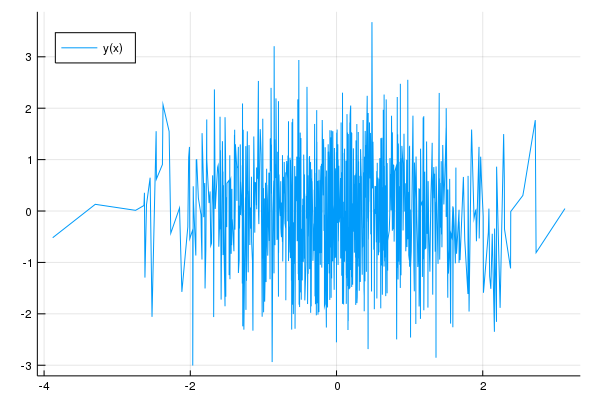

In [41]:
@df df plot(:x, :y, legend=:topleft, label="y(x)") # a most basic plot

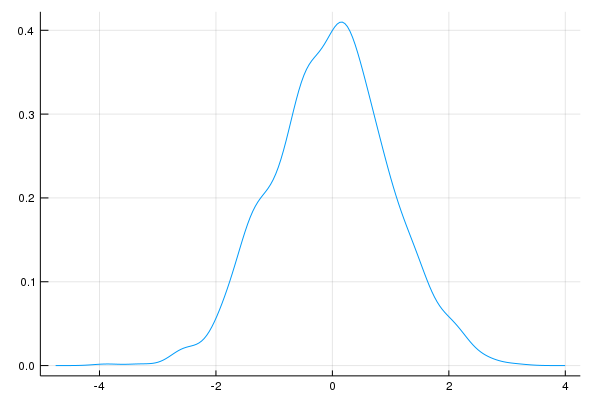

In [42]:
@df df density(:x, label="") # density plot

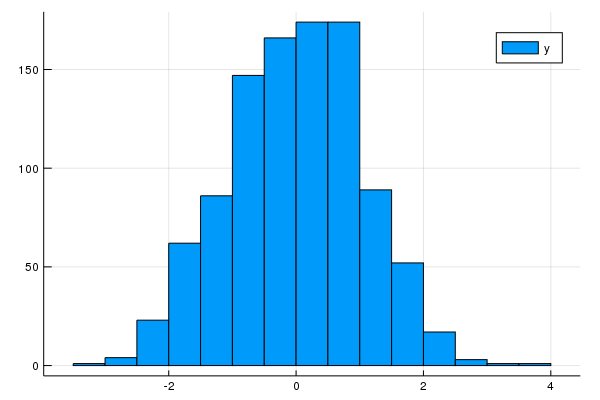

In [43]:
@df df histogram(:y, label="y") # and a histogram

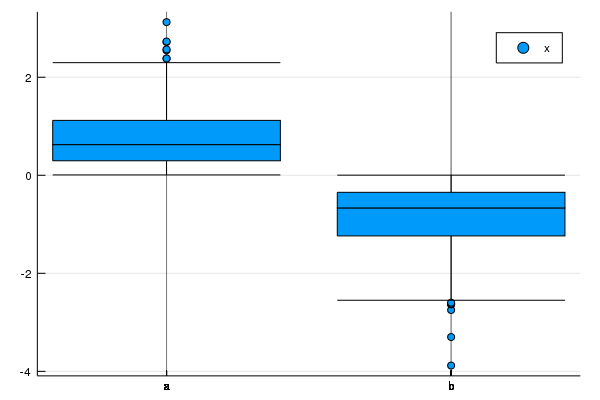

In [44]:
@df df boxplot(:z, :x, label="x")

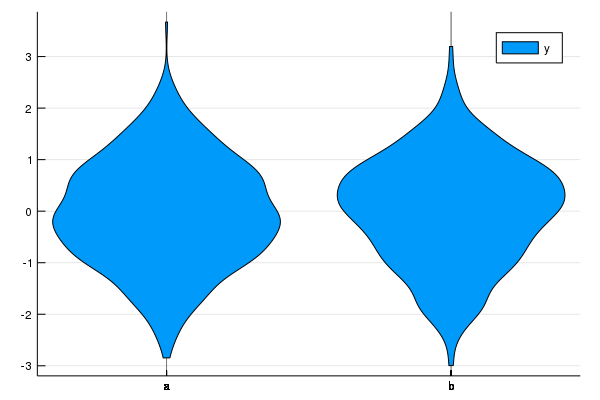

In [45]:
@df df violin(:z, :y, label="y") 